/Users/adriennekirk/miniconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/adriennekirk/miniconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/adriennekirk/miniconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


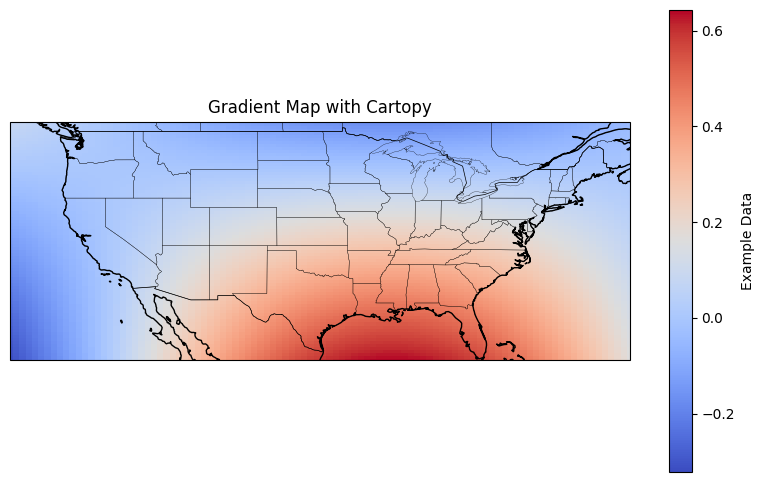

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create example lat/lon grid
lons = np.linspace(-130, -65, 100)
lats = np.linspace(25, 50, 80)
lon2d, lat2d = np.meshgrid(lons, lats)

# Create example data (like temperature)
data = np.sin(3 * np.pi * lon2d / 180) * np.cos(2 * np.pi * lat2d / 180)

# Set up projection and plot
fig, ax = plt.subplots(figsize=(10, 6),
                       subplot_kw={'projection': ccrs.PlateCarree()})

# Add features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.2)

# Plot the gradient using pcolormesh
c = ax.pcolormesh(lon2d, lat2d, data, cmap='coolwarm', shading='auto')

# Add colorbar
plt.colorbar(c, ax=ax, orientation='vertical', label='Example Data')

# Set extent (optional)
ax.set_extent([-130, -65, 25, 50], crs=ccrs.PlateCarree())

plt.title('Gradient Map with Cartopy')
plt.show()

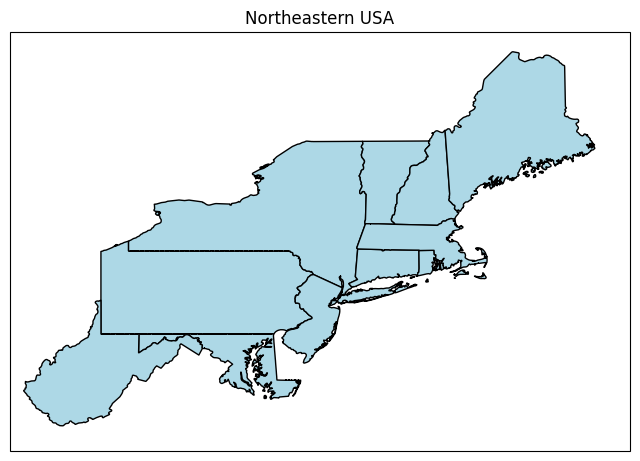

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import natural_earth, Reader

# List of states to show
states_to_plot = ['New York', 'New Jersey', 'Pennsylvania', 'Vermont', 'Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Delware', 'Maryland', 'West Virginia', 'Connecticut']

# Get US state geometries
shpfilename = natural_earth(resolution='10m', category='cultural',
                            name='admin_1_states_provinces_lakes')
reader = Reader(shpfilename)
states = reader.records()


# Create the plot
fig, ax = plt.subplots(figsize=(8, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

# Add just the selected states
for state in states:
    if state.attributes['admin'] == 'United States of America' and state.attributes['name'] in states_to_plot:
        ax.add_geometries([state.geometry],
                          ccrs.PlateCarree(),
                          facecolor='lightblue',
                          edgecolor='black')

# Optional: zoom in to region
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())

plt.title('Northeastern USA')
plt.show()

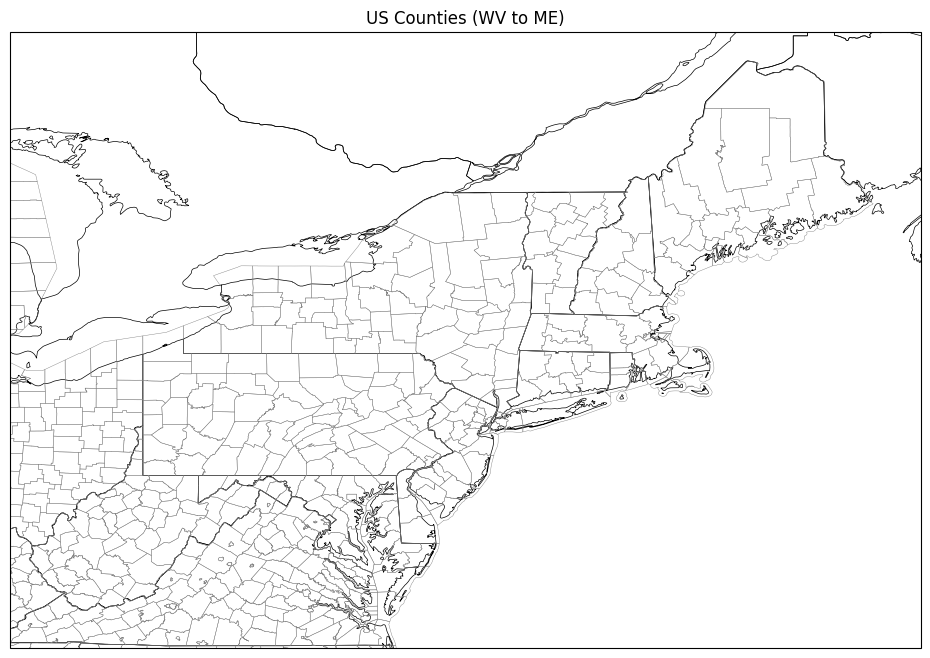

In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
import os

# Path to shapefile (update to your local path)
shapefile = "/Users/adriennekirk/Downloads/tl_2020_us_county/tl_2020_us_county.shp"

# Set up figure
fig, ax = plt.subplots(figsize=(12, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent for WV to ME (optional)
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())

# Add state borders
ax.add_feature(cfeature.STATES, linewidth=0.5)

# Add counties from shapefile
shape_feature = cfeature.ShapelyFeature(
    Reader(shapefile).geometries(),
    ccrs.PlateCarree(),
    facecolor='none', edgecolor='gray', linewidth=0.3
)
ax.add_feature(shape_feature)

plt.title('US Counties (WV to ME)')
plt.show()

/var/folders/ys/tnzmyp754gn2yv6qjy8jr8kw0000gn/T/ipykernel_9637/751527417.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('YlOrRd')


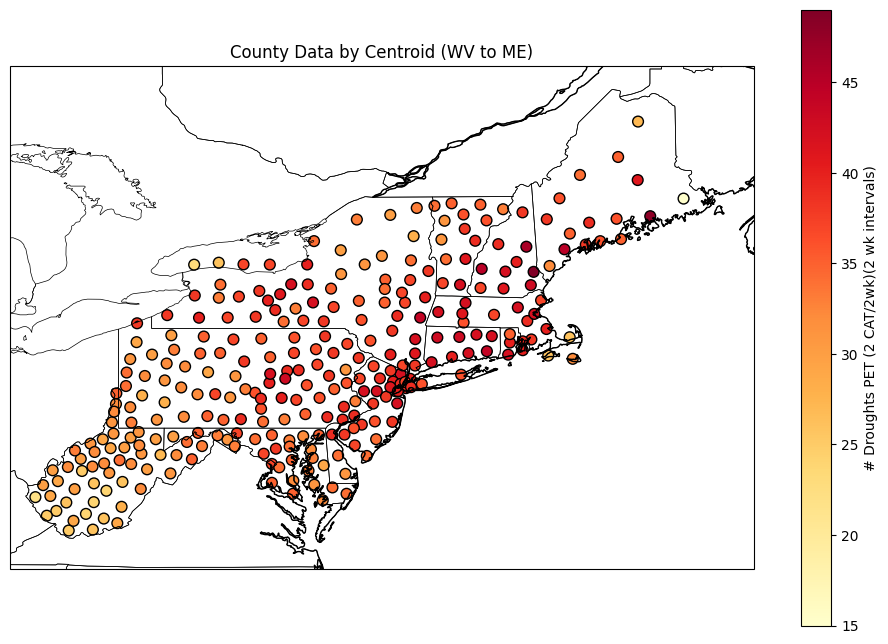

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load your data
df = pd.read_csv("/Users/adriennekirk/Desktop/Flash Droughts/Examples/Northeastern Full Data.csv")

# Example column names (adapt as needed)
# df columns: 'County', 'State', 'lat', 'lon', 'Value'

# Setup map
fig, ax = plt.subplots(figsize=(12, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, linewidth=0.5)

# Normalize and colormap
vmin, vmax = df['# Droughts PET (2 CAT/2wk)(2 wk intervals)'].min(), df['# Droughts PET (2 CAT/2wk)(2 wk intervals)'].max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('YlOrRd')

# Plot centroids as colored dots
sc = ax.scatter(df['lon'], df['lat'], c=df['# Droughts PET (2 CAT/2wk)(2 wk intervals)'],
                cmap=cmap, norm=norm, s=60, edgecolor='k',
                transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, label='# Droughts PET (2 CAT/2wk)(2 wk intervals)')

plt.title("County Data by Centroid (WV to ME)")
plt.show()

/var/folders/ys/tnzmyp754gn2yv6qjy8jr8kw0000gn/T/ipykernel_9637/2327193488.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('YlOrRd')


KeyError: 'STUSPS'

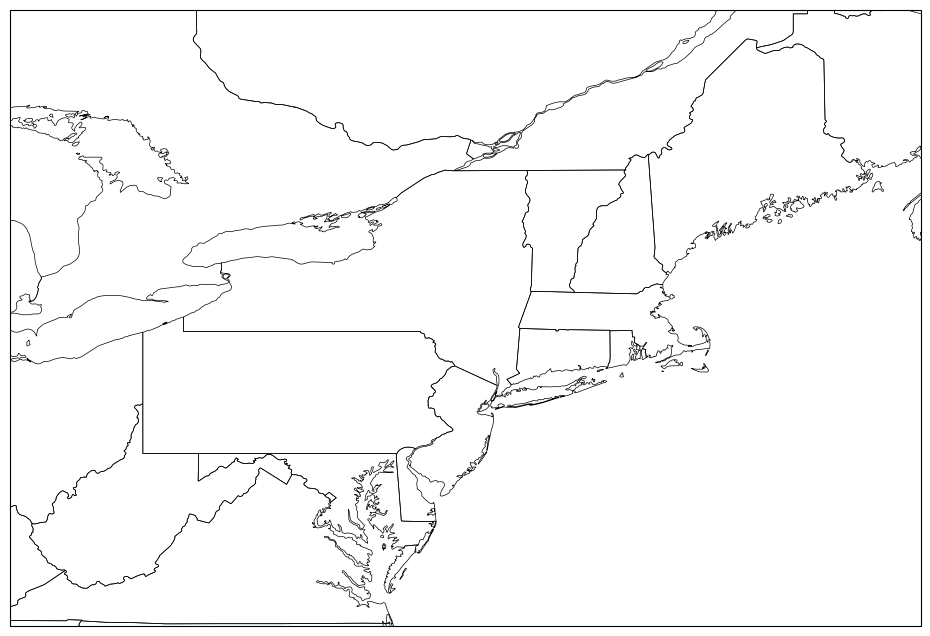

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable

# Load your data
df = pd.read_csv("/Users/adriennekirk/Desktop/Flash Droughts/Examples/Northeastern Full Data.csv")

# Clean and standardize
df['County'] = df['County'].str.lower().str.replace(" county", "").str.strip()
df['State'] = df['State'].str.lower().str.strip()
value_col = '# Droughts PET (2 CAT/2wk)(2 wk intervals)'

# Load shapefile
shapefile = "/Users/adriennekirk/Downloads/tl_2020_us_county/tl_2020_us_county.shp"
reader = Reader(shapefile)
records = list(reader.records())

# Set up map
fig, ax = plt.subplots(figsize=(12, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, linewidth=0.5)

# Colormap setup
vmin = df[value_col].min()
vmax = df[value_col].max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('YlOrRd')

# Helper: state FIPS to name mapping (or use abbrev if available)
# Alternatively, create a "county_state" key for matching
df['county_state'] = df['County'] + '_' + df['State']

# Plot counties
for rec in records:
    attrs = rec.attributes
    county_name = attrs['NAME'].lower().strip()
    statefp = attrs['STATEFP']
    state_abbr = attrs['STUSPS'].lower().strip()
    geom = rec.geometry

    key = f"{county_name}_{state_abbr}"

    if key in df['county_state'].values:
        value = df.loc[df['county_state'] == key, value_col].values[0]
        color = cmap(norm(value))
    else:
        color = 'lightgrey'  # No data match

    ax.add_geometries([geom], crs=ccrs.PlateCarree(),
                      facecolor=color, edgecolor='black', linewidth=0.2)

# Add colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label=value_col)

plt.title("County Filled Map: # Droughts PET (2 CAT/2wk)")
plt.show()


In [18]:
import pandas as pd

# Load and clean your data
df = pd.read_csv("/Users/adriennekirk/Desktop/Flash Droughts/Examples/Northeastern Full Data.csv")

# Strip spaces and lowercase for clean matching
df['County'] = df['County'].str.lower().str.strip()
df['State'] = df['State'].str.lower().str.strip()

# Add combined key for matching
df['county_state'] = df['County'] + '_' + df['State']

/var/folders/ys/tnzmyp754gn2yv6qjy8jr8kw0000gn/T/ipykernel_9637/2276665985.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('YlOrRd', 256)


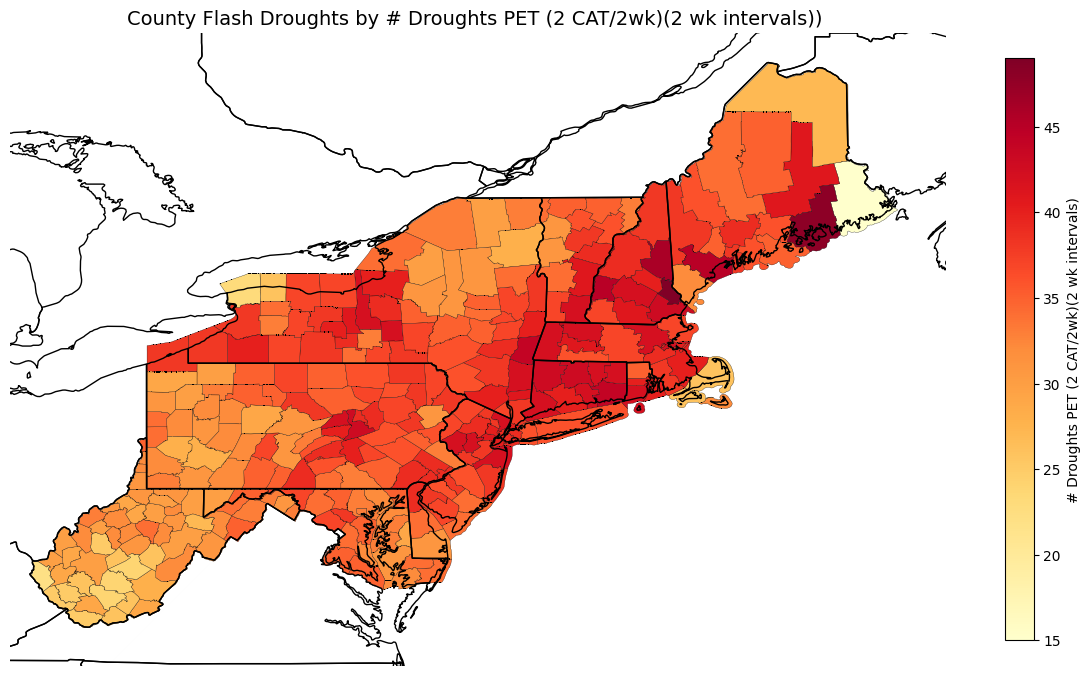

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import shapefile  # pyshp
from shapely.geometry import shape

# Choose which drought metric to map
value_col = '# Droughts PET (2 CAT/2wk)(2 wk intervals)'

# Normalize for colormap
vmin = df[value_col].min()
vmax = df[value_col].max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('YlOrRd', 256)

# FIPS → state abbreviation
statefp_to_abbr = {
    '09': 'ct', '23': 'me', '25': 'ma', '33': 'nh', '34': 'nj',
    '36': 'ny', '42': 'pa', '44': 'ri', '50': 'vt', '24': 'md',
    '54': 'wv', '10': 'de'
}

# Read shapefile
sf = shapefile.Reader("/Users/adriennekirk/Downloads/tl_2020_us_county/tl_2020_us_county.shp")
records = sf.shapeRecords()

# Create map
fig, ax = plt.subplots(figsize=(12, 10),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())


# Plot counties
for rec in records:
    attrs = rec.record.as_dict()
    county_name = attrs['NAME'].lower().strip()
    statefp = attrs['STATEFP']
    state_abbr = statefp_to_abbr.get(statefp, None)
    if not state_abbr:
        continue

    key = f"{county_name}_{state_abbr}"
    geom = shape(rec.shape.__geo_interface__)

    # Match and color
    if key in df['county_state'].values:
        value = df.loc[df['county_state'] == key, value_col].values[0]
        color = cmap(norm(value))
    else:
        color = 'lightgrey'

    ax.add_geometries([geom], crs=ccrs.PlateCarree(),
                      facecolor=color, edgecolor='black', linewidth=0.2)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label=value_col, shrink=0.6)
ax.axis('off')
ax.add_feature(cfeature.STATES, linewidth=1, edgecolor='black')
plt.title(f"County Flash Droughts by {value_col}) ", fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/ys/tnzmyp754gn2yv6qjy8jr8kw0000gn/T/ipykernel_9637/2586546370.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('YlOrRd', 256)
/Users/adriennekirk/miniconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


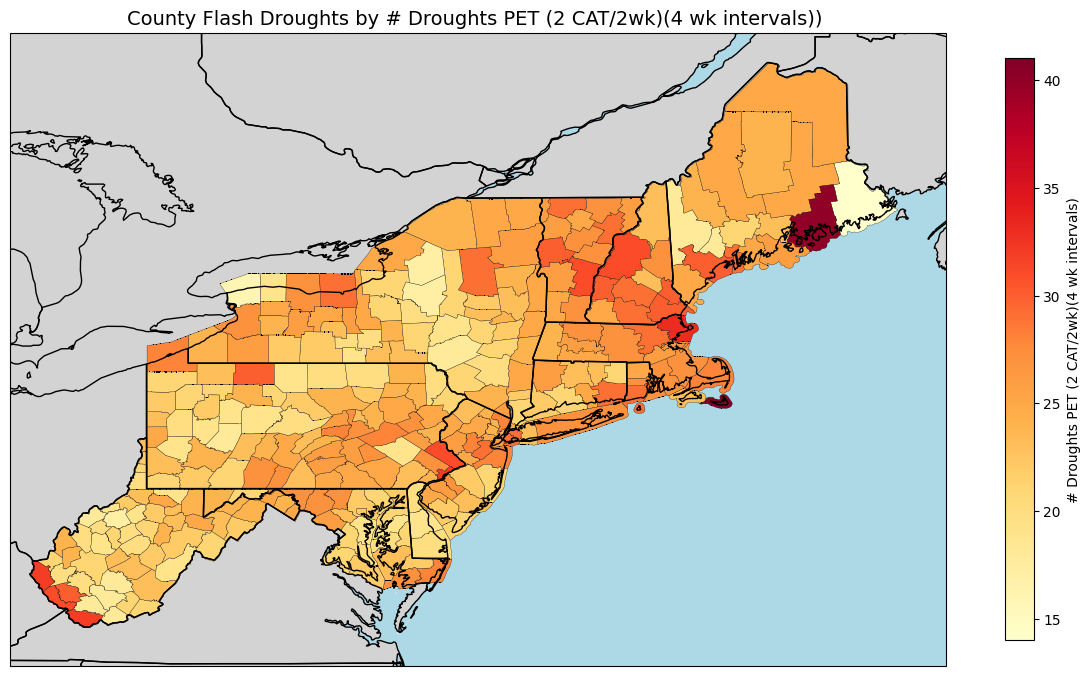

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import shapefile  # pyshp
from shapely.geometry import shape

# Choose which drought metric to map
value_col = '# Droughts PET (2 CAT/2wk)(4 wk intervals)'

# Normalize for colormap
vmin = df[value_col].min()
vmax = df[value_col].max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('YlOrRd', 256)

# FIPS → state abbreviation
statefp_to_abbr = {
    '09': 'ct', '23': 'me', '25': 'ma', '33': 'nh', '34': 'nj',
    '36': 'ny', '42': 'pa', '44': 'ri', '50': 'vt', '24': 'md',
    '54': 'wv', '10': 'de'
}

# Read shapefile
sf = shapefile.Reader("/Users/adriennekirk/Downloads/tl_2020_us_county/tl_2020_us_county.shp")
records = sf.shapeRecords()

# Create map
fig, ax = plt.subplots(figsize=(12, 10),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())


# Plot counties
for rec in records:
    attrs = rec.record.as_dict()
    county_name = attrs['NAME'].lower().strip()
    statefp = attrs['STATEFP']
    state_abbr = statefp_to_abbr.get(statefp, None)
    if not state_abbr:
        continue

    key = f"{county_name}_{state_abbr}"
    geom = shape(rec.shape.__geo_interface__)

    # Match and color
    if key in df['county_state'].values:
        value = df.loc[df['county_state'] == key, value_col].values[0]
        color = cmap(norm(value))
    else:
        color = 'lightgrey'

    ax.add_geometries([geom], crs=ccrs.PlateCarree(),
                      facecolor=color, edgecolor='black', linewidth=0.2)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label=value_col, shrink=0.6)
ax.add_feature(cfeature.STATES, linewidth=1, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='none')
from cartopy.feature import OCEAN, LAND, LAKES
from cartopy.mpl.patch import geos_to_path

# Add muted land/water colors
ax.add_feature(OCEAN, facecolor='lightblue', zorder=0)
ax.add_feature(LAKES, facecolor='lightblue', zorder=0)
ax.add_feature(LAND, facecolor='lightgray', zorder=0)
plt.title(f"County Flash Droughts by {value_col}) ", fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/ys/tnzmyp754gn2yv6qjy8jr8kw0000gn/T/ipykernel_9637/3378804011.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('YlOrRd', 256)


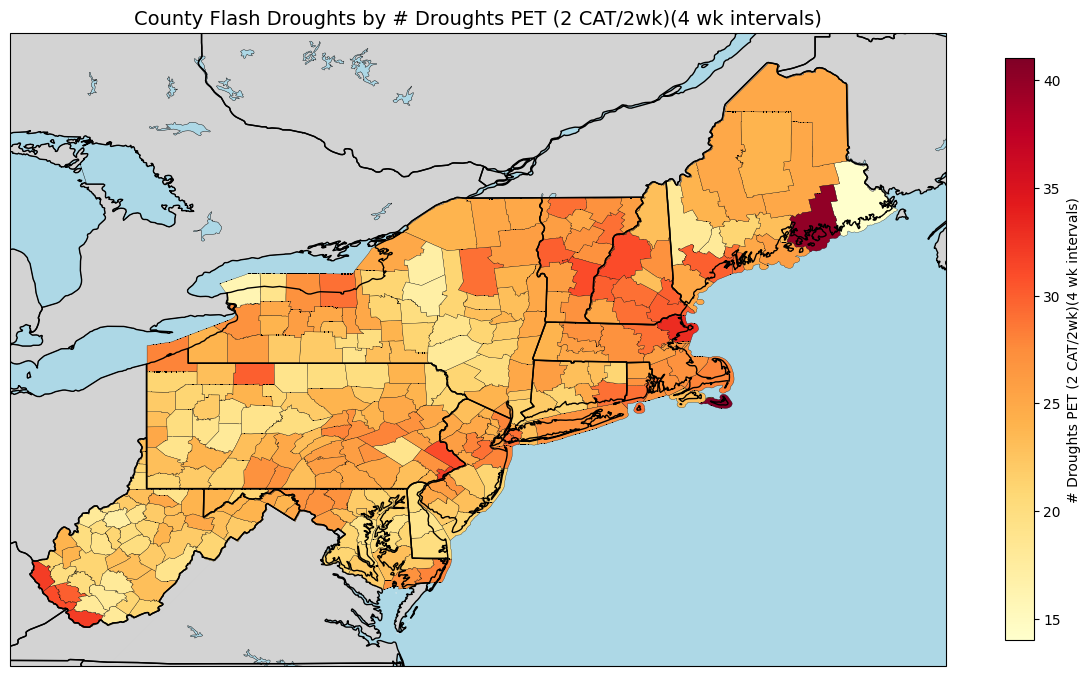

In [38]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import shapefile  # pyshp
from shapely.geometry import shape

# Choose which drought metric to map
value_col = '# Droughts PET (2 CAT/2wk)(4 wk intervals)'

# Normalize for colormap
vmin = df[value_col].min()
vmax = df[value_col].max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('YlOrRd', 256)

# FIPS → state abbreviation
statefp_to_abbr = {
    '09': 'ct', '23': 'me', '25': 'ma', '33': 'nh', '34': 'nj',
    '36': 'ny', '42': 'pa', '44': 'ri', '50': 'vt', '24': 'md',
    '54': 'wv', '10': 'de'
}

# Read shapefile
sf = shapefile.Reader("/Users/adriennekirk/Downloads/tl_2020_us_county/tl_2020_us_county.shp")
records = sf.shapeRecords()

# Create map
fig, ax = plt.subplots(figsize=(12, 10),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())

# Add background features

# Plot counties
for rec in records:
    attrs = rec.record.as_dict()
    county_name = attrs['NAME'].lower().strip()
    statefp = attrs['STATEFP']
    state_abbr = statefp_to_abbr.get(statefp, None)
    if not state_abbr:
        continue

    key = f"{county_name}_{state_abbr}"
    geom = shape(rec.shape.__geo_interface__)

    # Match and color
    if key in df['county_state'].values:
        value = df.loc[df['county_state'] == key, value_col].values[0]
        color = cmap(norm(value))
    else:
        color = 'lightgrey'

    ax.add_geometries([geom], crs=ccrs.PlateCarree(),
                      facecolor=color, edgecolor='black', linewidth=0.2)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label=value_col, shrink=0.6)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)
ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='black', linewidth=0.3, zorder=1)
ax.add_feature(cfeature.STATES, linewidth=1, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='none')

# Final touches
plt.title(f"County Flash Droughts by {value_col}", fontsize=14)
plt.tight_layout()
plt.show()
